0.47


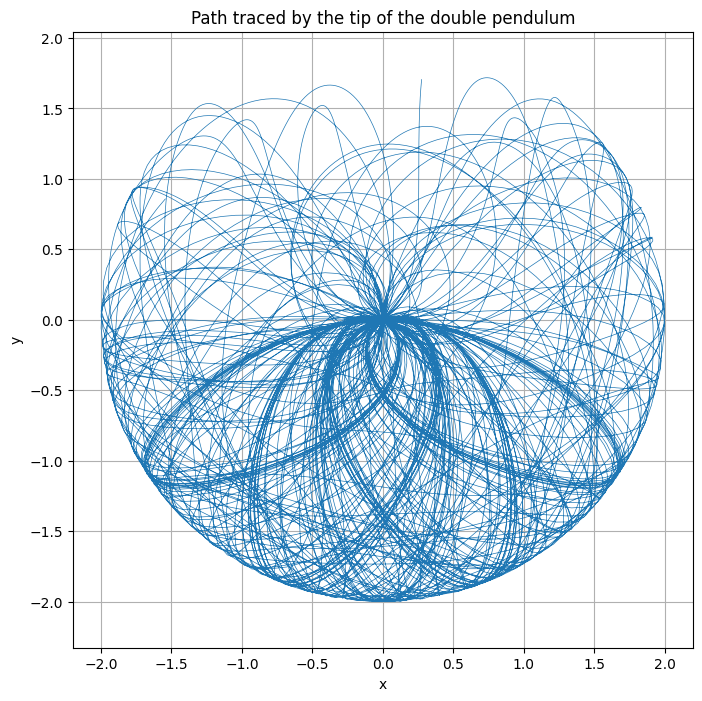

0.94


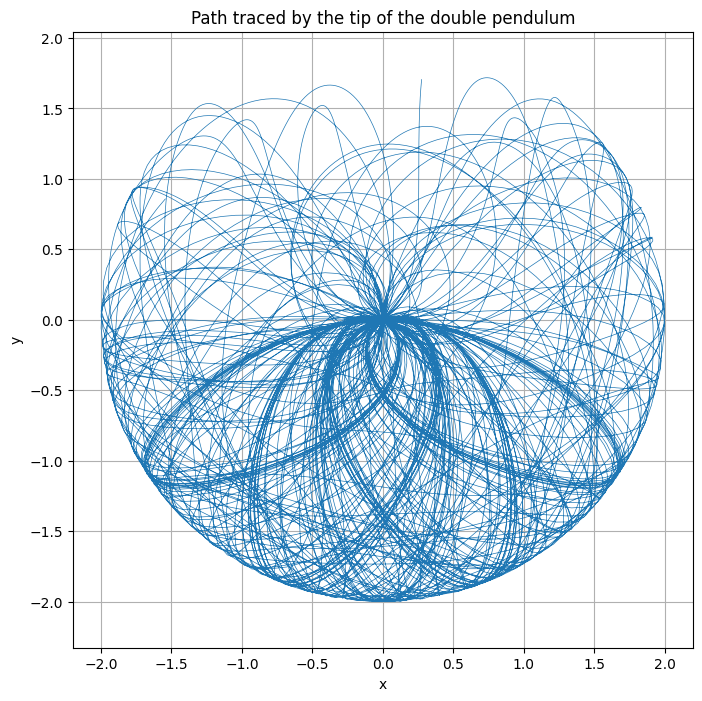

2.25


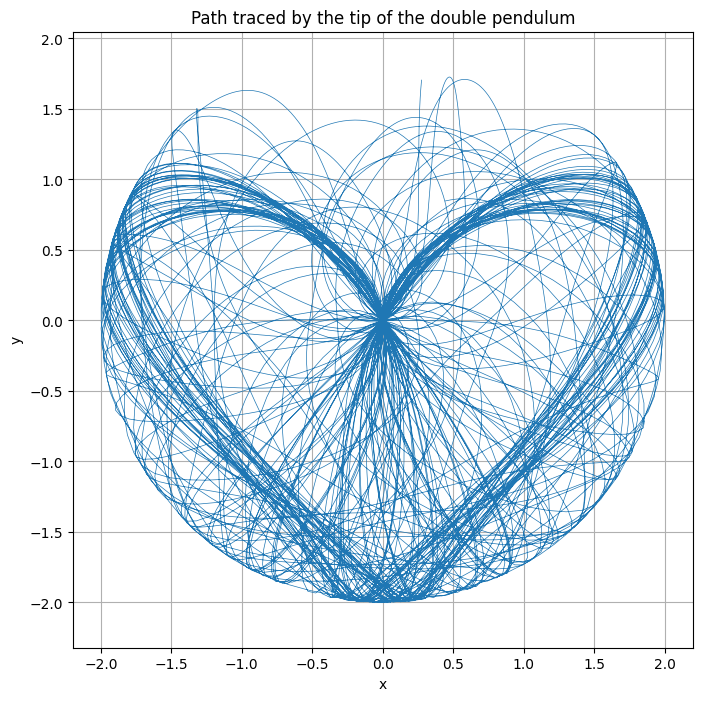

2.55


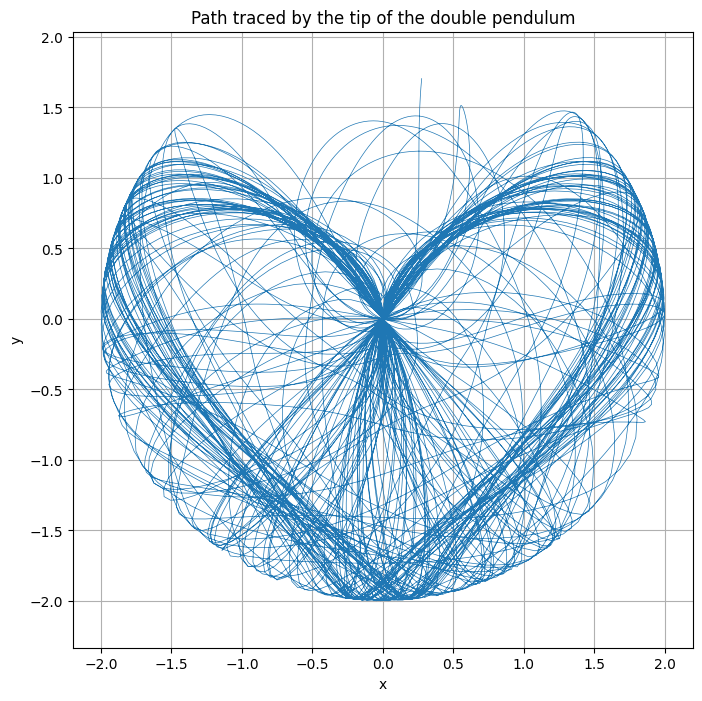

4.5


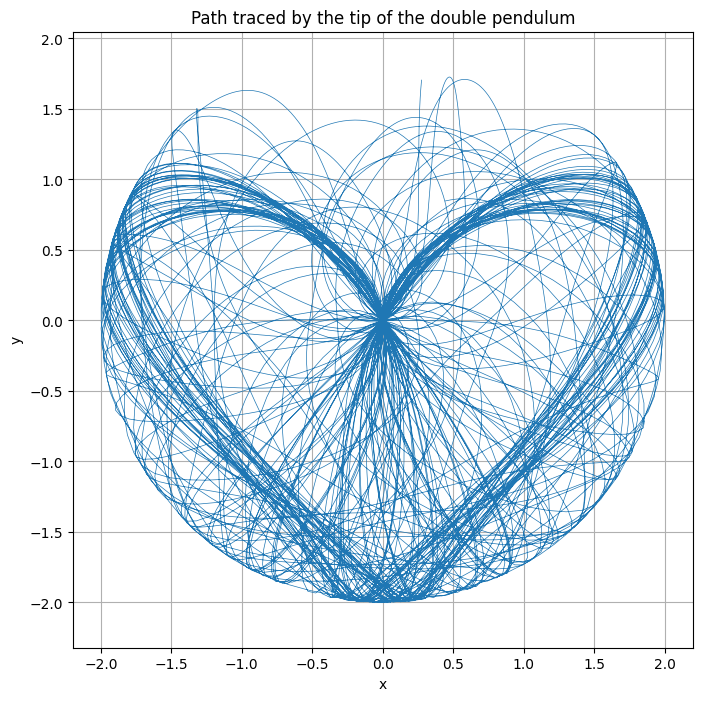

5.1


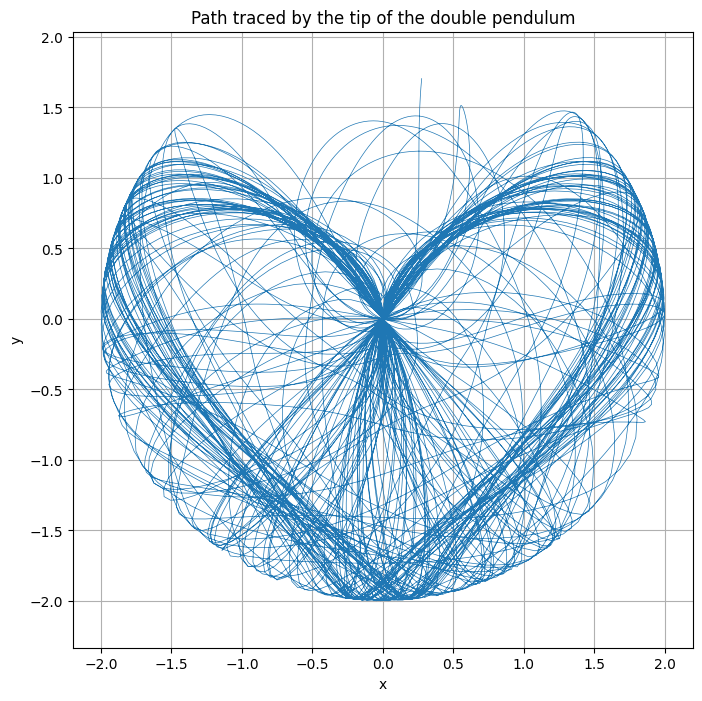

5.6


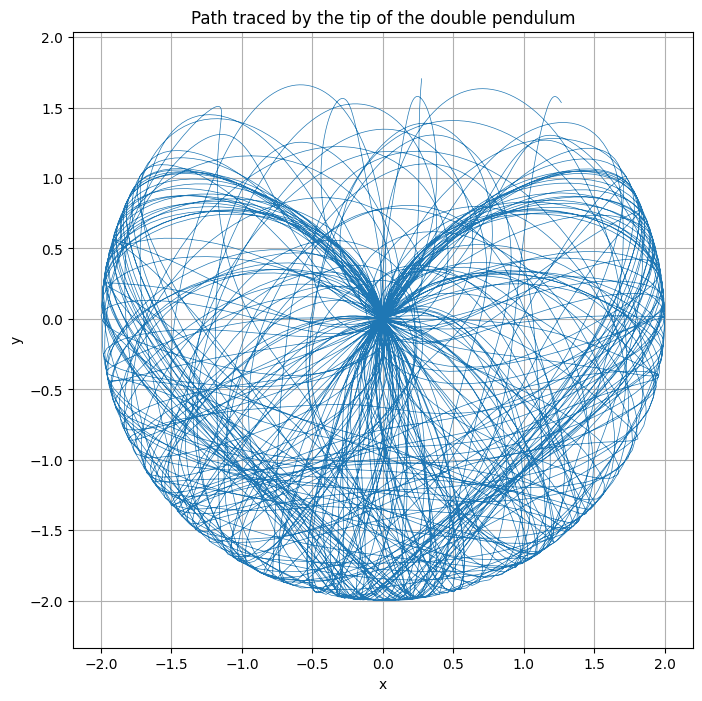

7.52


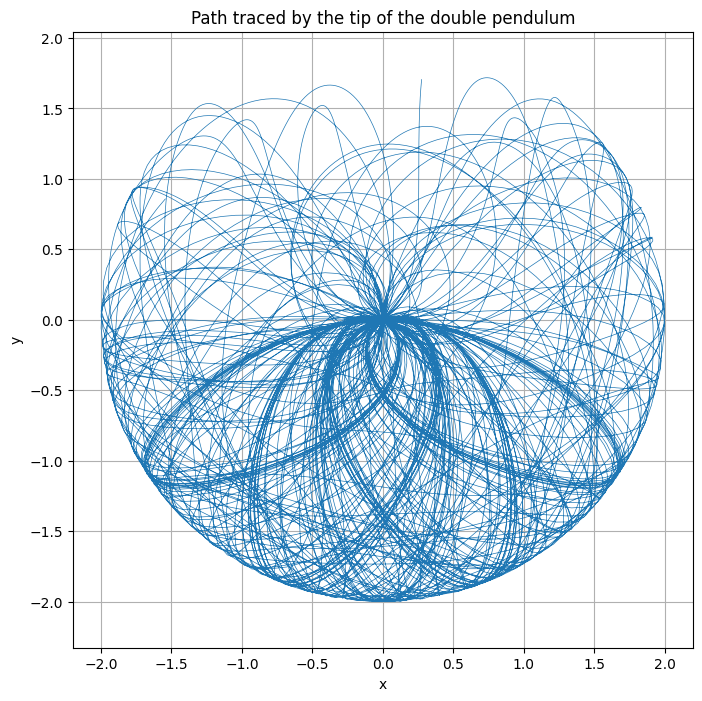

9.0


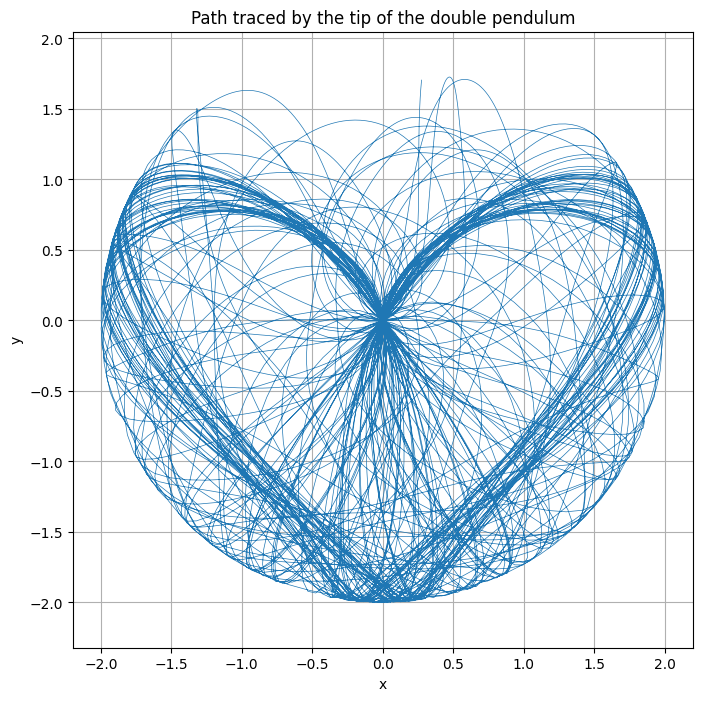

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

g = 1
L1 = L2 = 1.0

# Initial conditions:
theta1_0 = 2.453
theta2_0 = -2.7727
z1_0 = 0.0
z2_0 = 0.0
y0 = [theta1_0, z1_0, theta2_0, z2_0]

def deriv(y, t, L1, L2, m1, m2):
    theta1, z1, theta2, z2 = y

    delta = theta2 - theta1

    denom1 = (m1 + m2)*L1 - m2*L1*np.cos(delta)*np.cos(delta)
    denom2 = (L2/L1)*denom1

    dydt = np.zeros_like(y)
    dydt[0] = z1

    dydt[1] = (
        m2*L1*z1*z1*np.sin(delta)*np.cos(delta) +
        m2*g*np.sin(theta2)*np.cos(delta) +
        m2*L2*z2*z2*np.sin(delta) -
        (m1 + m2)*g*np.sin(theta1)
    ) / denom1

    dydt[2] = z2

    dydt[3] = (
        -m2*L2*z2*z2*np.sin(delta)*np.cos(delta) +
        (m1 + m2)*(g*np.sin(theta1)*np.cos(delta) -
        L1*z1*z1*np.sin(delta) - g*np.sin(theta2))
    ) / denom2

    return dydt

t = np.linspace(0, 500, 10000)

cool_angles = [47, 94, 225, 255, 450, 510, 560, 752, 900, ]

for n in cool_angles:

  m1 = m2 = n/100
  print(m1)
  sol = odeint(deriv, y0, t, args=(L1, L2, m1, m2))

  theta1 = sol[:, 0]
  theta2 = sol[:, 2]

  x1 = L1 * np.sin(theta1)
  y1 = -L1 * np.cos(theta1)

  x2 = x1 + L2 * np.sin(theta2)
  y2 = y1 - L2 * np.cos(theta2)

  # Plotting the path traced by the tip of the double pendulum
  plt.figure(figsize=(8, 8))
  plt.plot(x2, y2, lw=0.5)
  plt.title("Path traced by the tip of the double pendulum")
  plt.xlabel('x')
  plt.ylabel('y')
  plt.axis('equal')
  plt.grid(True)
  plt.show()
